# SIR model

I provide calculations of the SIR model used in my seminar given in May 2020 (see [slides](utapseminar2020.pdf) for mode details). As explained in the slides, the SIR is the following set of differential equations

![SIR model](img/sir.jpg)

## Time evolution for a fixed $R_0$

First I fix $R_0=3$, $\beta=0.3$ day$^{-1}$, and $\gamma=0.1$ day$^{-1}$, and see the time evolution of `Susceptible`, `Infectious`, and `Removed`. Initially most people are never infected ($S$) and only 0.01% are infected ($I$). This can be solved as

Text(0.5, 1.0, 'SIR model')

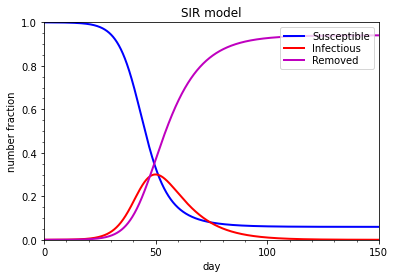

In [1]:
%matplotlib inline

import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib as mpl
import matplotlib.pyplot as plt

model_name = 'SIR model'

# differential equations for [x[0], x[1], x[2]] = [S, I, R]
def eqs_sir(x, t, beta, gamma):
    return [(-1.0) * beta * x[0] * x[1] / (x[0] + x[1] + x[2]), \
        beta * x[0] * x[1] / (x[0] + x[1] + x[2]) - gamma * x[1], \
        gamma * x[1]]

# time step
t_max = 500
dt = 0.01
times = np.arange(0, t_max, dt)

# initial state
S_0 = 9999
I_0 = 1
R_0 = 0
ini_state = [S_0, I_0, R_0] 
N_0 = S_0 + I_0 + R_0

# solve equations using scipy.integrate
args = (0.3, 0.1)
result_r3 = odeint(eqs_sir, ini_state, times, args)

# plotting
xmin = 0.0
xmax = 150.0
ymin = 0.0
ymax = 1.0

plt.plot(times, result_r3[:,0] / N_0, color = 'b', lw = 2)
plt.plot(times, result_r3[:,1] / N_0, color = 'r', lw = 2)
plt.plot(times, result_r3[:,2] / N_0, color = 'm', lw = 2)

plt.legend(['Susceptible', 'Infectious', 'Removed'], labelspacing = 0.2, numpoints = 1, loc = 'upper right')

ax = plt.gca()
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(50.0))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10.0))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))

plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])

plt.xlabel('day')
plt.ylabel('number fraction')
plt.title(model_name)

It is seen that most (>90%) people experiences the infection. 

## Dependence on $R_0$

Next I change the value of $\beta$ (and hence $R_0$) to see the dependence of the result on $R_0$

Text(0.5, 1.0, 'SIR model')

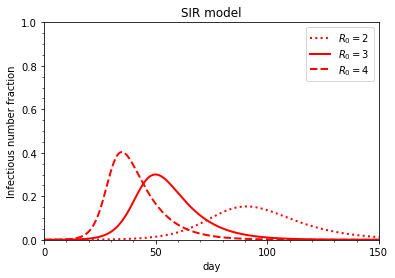

In [2]:
# solve equations using scipy.integrate
args = (0.2, 0.1)
result_r2 = odeint(eqs_sir, ini_state, times, args)

args = (0.4, 0.1)
result_r4 = odeint(eqs_sir, ini_state, times, args)

# plotting
plt.plot(times, result_r2[:,1] / N_0, ':', color = 'r', lw = 2)
plt.plot(times, result_r3[:,1] / N_0, '-', color = 'r', lw = 2)
plt.plot(times, result_r4[:,1] / N_0, '--', color = 'r', lw = 2)

plt.legend(['$R_0=2$', '$R_0=3$', '$R_0=4$'], labelspacing = 0.2, numpoints = 1, loc = 'upper right')

ax = plt.gca()
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(50.0))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10.0))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))

plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])

plt.xlabel('day')
plt.ylabel('Infectious number fraction')
plt.title(model_name)

The plot above shows the difference of `Infectious` for different $R_0$. The difference of `Removed` is

Text(0.5, 1.0, 'SIR model')

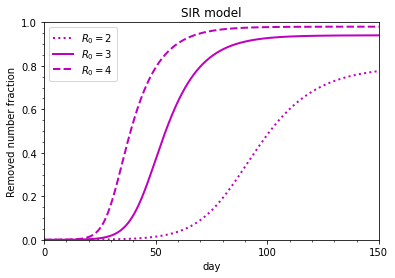

In [3]:
# plotting
plt.plot(times, result_r2[:,2] / N_0, ':', color = 'm', lw = 2)
plt.plot(times, result_r3[:,2] / N_0, '-', color = 'm', lw = 2)
plt.plot(times, result_r4[:,2] / N_0, '--', color = 'm', lw = 2)

plt.legend(['$R_0=2$', '$R_0=3$', '$R_0=4$'], labelspacing = 0.2, numpoints = 1, loc = 'upper left')


ax = plt.gca()
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(50.0))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10.0))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))

plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])

plt.xlabel('day')
plt.ylabel('Removed number fraction')
plt.title(model_name)

For smaller $R_0$, the peak of $I$ gets smaller and also results in the smaller converged value of $R$. It is also useful to plot the time evolution in logarithmic scale

Text(0.5, 1.0, 'SIR model')

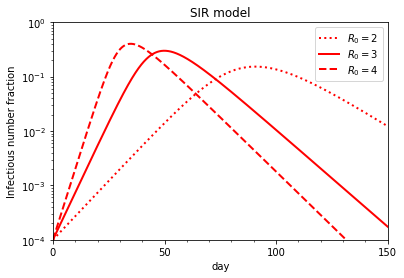

In [4]:
# plotting
ymin = 0.0001
ymax = 1.0

plt.plot(times, result_r2[:,1] / N_0, ':', color = 'r', lw = 2)
plt.plot(times, result_r3[:,1] / N_0, '-', color = 'r', lw = 2)
plt.plot(times, result_r4[:,1] / N_0, '--', color = 'r', lw = 2)

plt.legend(['$R_0=2$', '$R_0=3$', '$R_0=4$'], labelspacing = 0.2, numpoints = 1, loc = 'upper right')

ax = plt.gca()
ax.set_yscale('log')
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(50.0))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10.0))

plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])

plt.xlabel('day')
plt.ylabel('Infectious number fraction')
plt.title(model_name)

It is found that $I$ grows exponentially at the early stage with the different slope for different $R_0$. 